# Sommaire :
 <a href="#C1">Importation des données</a>
 
**Partie 1 : <a href="#P1">Analyse Univariée</a>**
 - <a href="#P1C1"> P1C1 - Représentez la distribution empirique d'une variable</a>
 - <a href="#P1C2"> P1C2 - Les mesures de tendance centrale</a>
 - <a href="#P1C3"> P1C3 - Les mesures de dispersion</a>
 - <a href="#P1C4"> P1C4 - Les mesures de forme</a>
 
**Partie 2 : <a href="#P2">Analyse Bivariée</a>**
 - <a href="#P2C1"> P2C1 - Analyse de la corrélation entre deux variables quantitatives</a>
 - <a href="#P2C2"> P2C2 - Analyse de deux variables quantitatives par régression linéaire</a>

**Partie 3 : <a href="#P3">Analyse Exploratoire</a>**
 - <a href="#P3C1"> P3C1 - Analyse en Composantes Principales</a>
 
    <a href ="#P3C11"> 1.Centrer et réduire les données </a>
    
    <a href ="#P3C12"> 2.Variance expliquée </a>
    
    <a href ="#P3C13"> 3.Représentation des individus </a>
    
    <a href ="#P3C14"> 4.Représentation des variables </a>


# <a name="C1">Importation des données</a>

Nous allons importer le fichier données traitées. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

data = pd.read_csv('Product_Clean.csv')
data.head()

C:\Users\dmedc\AppData\Local\Temp\ipykernel_37468\3038505472.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Product_Clean.csv')


,Unnamed: 0,code,product_name,origins,categories,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,sugars_100g,omega-3-fat_100g,fiber_100g,carbohydrates_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0,3087,Farine de blé noir,Aucune,Aucune,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b
1,1,4530,Banana Chips Sweetened (Whole),Aucune,Aucune,0.0,0.0,28.570000,28.570000,14.290000,3.182103,3.600000,64.290000,14.0,d
2,2,4559,Peanuts,Aucune,Aucune,0.0,0.0,17.860000,0.000000,17.860000,3.182103,7.100000,60.710000,0.0,b
3,3,16087,Organic Salted Nut Mix,Aucune,Aucune,0.0,0.0,57.140000,5.360000,3.570000,3.182103,7.100000,17.860000,12.0,d
4,4,16094,Organic Polenta,Aucune,Aucune,0.0,0.0,1.430000,1.430000,16.003369,3.182103,5.700000,77.140000,3.0,c


In [2]:
#Supprimer la colonne "Unnamed: 0"
data = data.drop(["Unnamed: 0"],axis=1)

# <a name="P1"> P1 - Analyse Univariée</a>

## <a name="P1C1"> P1C1 - Représentez la distribution empirique d'une variable</a>

**1. variables qualitatives**

**a.) Representation en tableau**

Nous allons faire la represantation de la distribution de la variable **"origins"**

In [3]:
%%time
effectifs = data["origins"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["origins"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = tab_grade["n"]/len(data) # len(data) renvoie la taille de l'échantillon
tab_grade["F"] = tab_grade["f"].cumsum()

display(tab_grade)

,origins,n,f,F
0,Aucune,298565,0.930886,0.930886
1,France,5171,0.016122,0.947009
2,España,569,0.001774,0.948783
3,Italie,473,0.001475,0.950258
4,Australia,434,0.001353,0.951611
...,...,...,...,...
4814,pomme de terre (Allemagne France Pays-Bas),1,0.000003,0.999988
4815,Nouvelle zélande,1,0.000003,0.999991
4816,"Nouvelle-Zélande,Union Européenne",1,0.000003,0.999994
4817,"Emmental,France,Allemagne",1,0.000003,0.999997


CPU times: total: 31.2 ms
Wall time: 24.9 ms


**95%** des produits sont originaires de quatre (4) pays et dont l'origine n'est connue. ci-dessous leur liste

In [4]:
origine = tab_grade.iloc[:5]
List_origine = list(origine["origins"])
List_origine

['Aucune', 'France', 'España', 'Italie', 'Australia']

Nous allons faire la represantation de la distribution de la variable **"categories"**

In [5]:
effectifs = data["categories"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["categories"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = tab_grade["n"]/len(data) # len(data) renvoie la taille de l'échantillon
tab_grade["F"] = tab_grade["f"].cumsum()

display(tab_grade)

,categories,n,f,F
0,Aucune,236345,0.736892,0.736892
1,"Snacks sucrés,Biscuits et gâteaux,Biscuits",301,0.000938,0.737831
2,Biscuits,287,0.000895,0.738726
3,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...",247,0.000770,0.739496
4,"Aliments et boissons à base de végétaux,Alimen...",222,0.000692,0.740188
...,...,...,...,...
36972,"Conserves,Plats préparés,Plats préparés en con...",1,0.000003,0.999988
36973,"Conserves,Plats préparés,Plats à base de viand...",1,0.000003,0.999991
36974,"Conserves,Plats préparés,Plats à base de viand...",1,0.000003,0.999994
36975,"Conserves,Plats préparés,Plats à base de viand...",1,0.000003,0.999997


Nous avons **26%** des produits identifiés en **36.977** catégories

Nous allons faire la represantation de la distribution de la variable **"nutrition_grade_fr"**

Il faut savoir que les lettres du nutrition_grade sont fonction de la la valeur de du nutrition_score du produit :

- a = [-15 ; -1]
- b = [0 ; 2]
- c = [3 ; 10]
- d = [11 ; 18]
- e = [19 ; 40]

**NB** : Plus la valeur du  nutrition_score est faible plus on a un produit de qualité.

In [6]:
effectifs = data["nutrition_grade_fr"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["nutrition_grade_fr"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = tab_grade["n"] / len(data) # len(data) renvoie la taille de l'échantillon

display(tab_grade)

,nutrition_grade_fr,n,f
0,b,101065,0.315107
1,d,74983,0.233787
2,c,59460,0.185388
3,e,47409,0.147815
4,a,37815,0.117902


**b.) Representation en graphique**

variable : "nutrition_grade_fr"

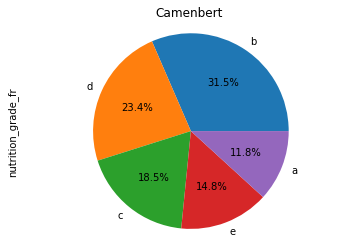

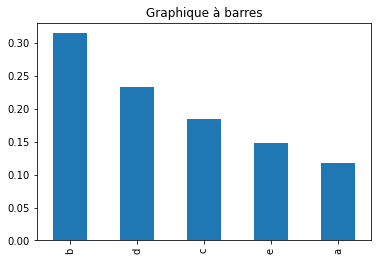

In [7]:
# Diagramme en secteurs
data["nutrition_grade_fr"].value_counts(normalize=True).plot(kind='pie',autopct="%1.1f%%")
plt.axis('equal')
plt.title("Camenbert")
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["nutrition_grade_fr"].value_counts(normalize=True).plot(kind='bar')
plt.title("Graphique à barres")
plt.show()

Nous constatons que un tiers (1/3) des produits a un nutrition_grade egale **b**. Alors que nutrition_grade b à le plus petit intervalle de valeurs.

**2. variables quantitatives discrètes**

Présentez les variables "additives_n" et "ingredients_from_palm_oil_n" sous forme de tableau

In [8]:
effectifs = data["additives_n"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["additives_n"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

tab = tab.sort_values("additives_n") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

display(tab)

,additives_n,n,f,F
0,0.0,166066,0.517772,0.517772
1,1.0,46505,0.144996,0.662768
2,2.0,36516,0.113852,0.776620
3,3.0,23679,0.073828,0.850448
4,4.0,15239,0.047513,0.897962
5,5.0,10935,0.034094,0.932055
6,6.0,7289,0.022726,0.954782
7,7.0,4702,0.014660,0.969442
8,8.0,3359,0.010473,0.979915
9,9.0,2194,0.006841,0.986755


Plus de **90%** des produits ont moins de cinq (5) additifs.

In [9]:
data_ad = data.loc[data['additives_n']<5,:]

In [10]:
effectifs = data["ingredients_from_palm_oil_n"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["ingredients_from_palm_oil_n"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

tab = tab.sort_values("ingredients_from_palm_oil_n") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

display(tab)

,ingredients_from_palm_oil_n,n,f,F
0,0.0,315897,0.984925,0.984925
1,1.0,4776,0.014891,0.999816
2,2.0,59,0.000184,1.000000


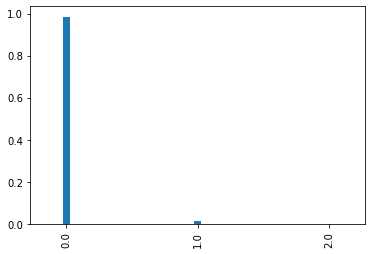

In [11]:
# Diagramme en bâtons
data["ingredients_from_palm_oil_n"].value_counts(normalize=True).plot(kind='bar',width=0.05)
plt.show()

Environ **99%** des produits ne contient aucun ingrédient d'huile de palme

**3. variables quantitatives Continues**

La distribution graphique de trois nutriments déconseillés pour les diabétiques.

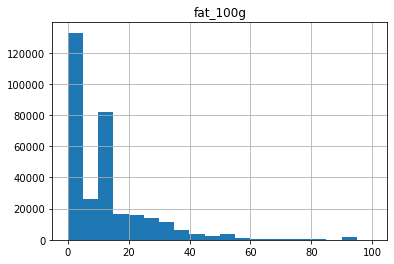

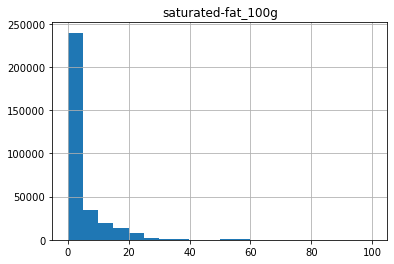

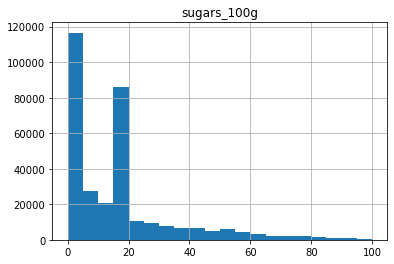

In [12]:
# Histogrammes

data["fat_100g"].hist(bins=20)
plt.title("fat_100g")
plt.show()

data["saturated-fat_100g"].hist(bins=20)
plt.title("saturated-fat_100g")
plt.show()

data["sugars_100g"].hist(bins=20)
plt.title("sugars_100g")
plt.show()

La distribution graphique de trois nutriments conseillés pour les diabétiques.

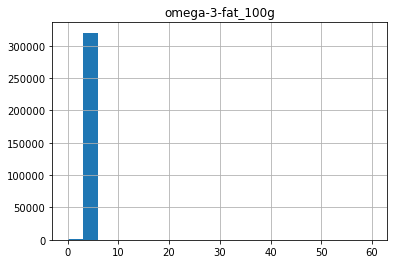

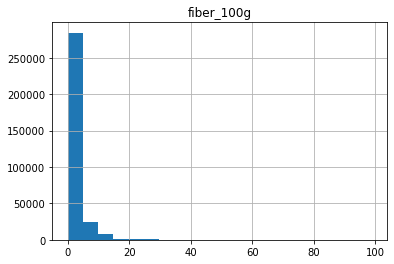

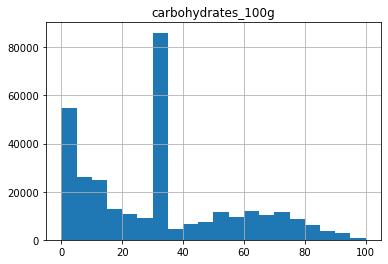

In [13]:
# Histogrammes

data["omega-3-fat_100g"].hist(bins=20)
plt.title("omega-3-fat_100g")
plt.show()

data["fiber_100g"].hist(bins=20)
plt.title("fiber_100g")
plt.show()

data["carbohydrates_100g"].hist(bins=20)
plt.title("carbohydrates_100g")
plt.show()

La majorité des produits ont des proportions de ces six (6) nutriments étudiés, inférieures à 10%

Nous allons calculer les mésures pour la variable **"nutrition-score-fr_100g"**

## <a name="P1C2"> P1C2 - Les mesures de tendance centrale</a>

In [14]:
data['nutrition-score-fr_100g'].mode()

0    0.0
Name: nutrition-score-fr_100g, dtype: float64

In [15]:
data['nutrition-score-fr_100g'].mean()

7.454857949939513

In [16]:
data['nutrition-score-fr_100g'].median()

5.0

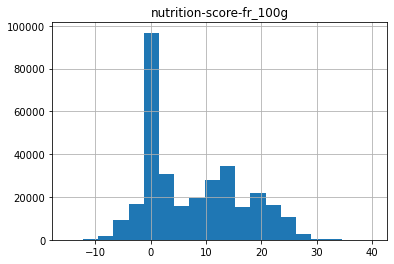

In [17]:
data["nutrition-score-fr_100g"].hist(bins=20)
plt.title("nutrition-score-fr_100g")
plt.show()

Il serait intéressant de calculer ces mesures pour chaque origine de produit notament les quatre (4) origines représentants  

In [18]:
data_n = data.loc[data["origins"].isin(List_origine)]

--------------------
Aucune
moy:
 7.628432669602934
med:
 6.0
mod:
 0    0.0
Name: nutrition-score-fr_100g, dtype: float64


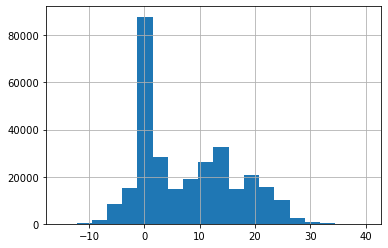

--------------------
France
moy:
 5.377779926513247
med:
 2.0
mod:
 0    0.0
Name: nutrition-score-fr_100g, dtype: float64


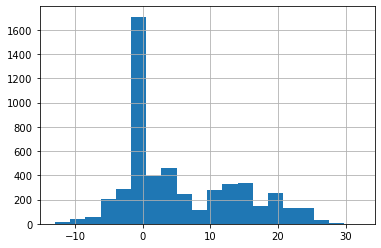

--------------------
Italie
moy:
 4.614164904862579
med:
 1.0
mod:
 0    0.0
Name: nutrition-score-fr_100g, dtype: float64


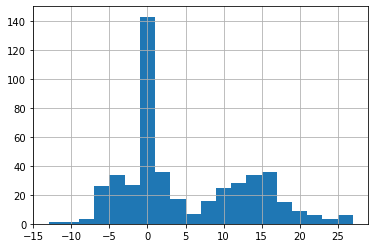

--------------------
Australia
moy:
 3.1589861751152073
med:
 0.0
mod:
 0    0.0
Name: nutrition-score-fr_100g, dtype: float64


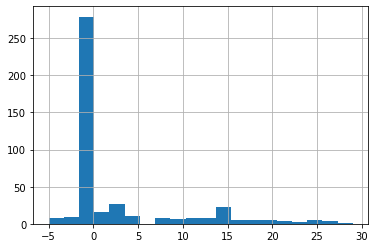

--------------------
España
moy:
 2.766256590509666
med:
 0.0
mod:
 0    0.0
Name: nutrition-score-fr_100g, dtype: float64


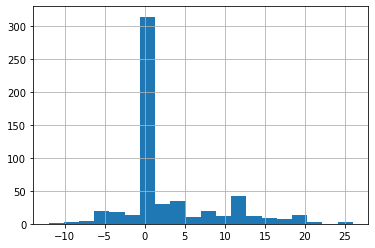

In [19]:
for cat in data_n["origins"].unique():
    subset = data[data.origins == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['nutrition-score-fr_100g'].mean())
    print("med:\n",subset['nutrition-score-fr_100g'].median())
    print("mod:\n",subset['nutrition-score-fr_100g'].mode())
    subset['nutrition-score-fr_100g'].hist(bins=20) # Crée l'histogramme
    plt.show() # Affiche l'histogramme

## <a name="P1C3"> P1C3 - Les mesures de dispersion</a>

- **'nutrition-score-fr_100g'**

Variance :
 75.44339075673436
Ecart-type :
 8.68581549175058
CV :
 1.1651215288174679
----------------------------------------------------------------------------------------------------


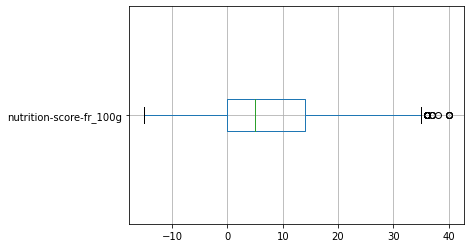

In [20]:
print("Variance :\n",data['nutrition-score-fr_100g'].var())
print("Ecart-type :\n",data['nutrition-score-fr_100g'].std())
print("CV :\n",data['nutrition-score-fr_100g'].std()/data['nutrition-score-fr_100g'].mean())

print("-"*100)

data.boxplot(column='nutrition-score-fr_100g',vert=False)
plt.show()

Nous constatons une grande dispersion de la variable 'nutrition-score-fr_100g' avec des Outliers supérieurs à 35

- **'additives_n'**

Variance :
 5.509972278476868
Ecart-type :
 2.347333013970721
CV :
 1.5622356893577858
----------------------------------------------------------------------------------------------------


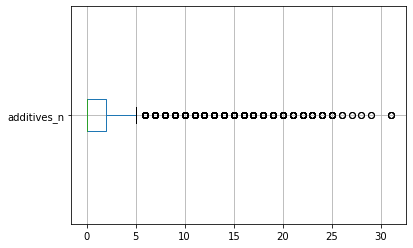

In [21]:
print("Variance :\n",data['additives_n'].var())
print("Ecart-type :\n",data['additives_n'].std())
print("CV :\n",data['additives_n'].std()/data['additives_n'].mean())

print("-"*100)

data.boxplot(column='additives_n',vert=False)
plt.show()

Toute valeurs sup à 5 est un outlier.

- **Les nutriments**

saturated-fat_100g:



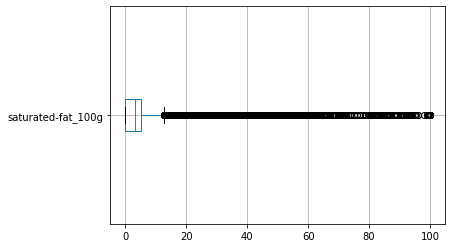

----------------------------------------
fat_100g:



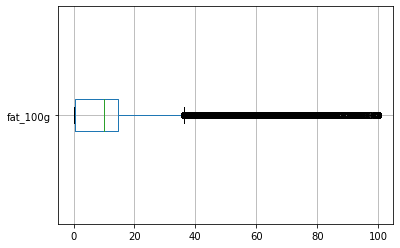

----------------------------------------
sugars_100g:



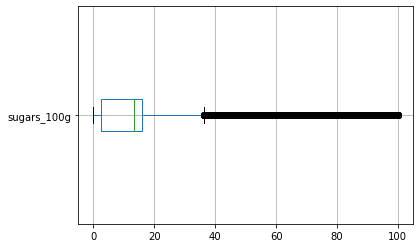

----------------------------------------


In [22]:
print("saturated-fat_100g:\n")
data.boxplot(column='saturated-fat_100g',vert=False)
plt.show()
print("-"*40)

print("fat_100g:\n")
data.boxplot(column='fat_100g',vert=False)
plt.show()
print("-"*40)

print("sugars_100g:\n")
data.boxplot(column='sugars_100g',vert=False)
plt.show()
print("-"*40)

omega-3-fat_100g:



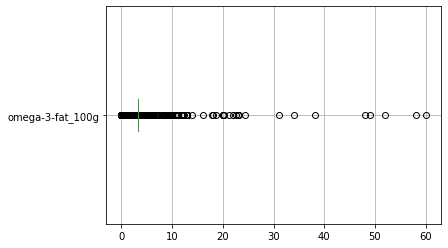

----------------------------------------
fiber_100g:



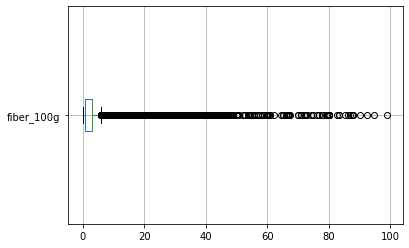

----------------------------------------
carbohydrates_100g:



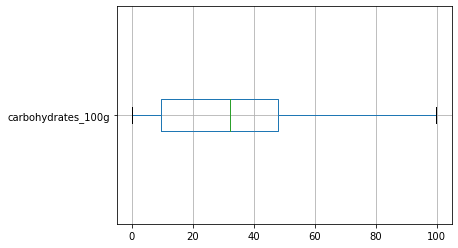

----------------------------------------


In [23]:
print("omega-3-fat_100g:\n")
data.boxplot(column='omega-3-fat_100g',vert=False)
plt.show()
print("-"*40)

print("fiber_100g:\n")
data.boxplot(column='fiber_100g',vert=False)
plt.show()
print("-"*40)

print("carbohydrates_100g:\n")
data.boxplot(column='carbohydrates_100g',vert=False)
plt.show()
print("-"*40)

## <a name="P1C4"> P1C4 - Les mesures de forme de la varaiable 'nutrition-score-fr_100g' </a>

In [24]:
data['nutrition-score-fr_100g'].skew()

0.486435519814633

In [25]:
data['nutrition-score-fr_100g'].kurtosis()

-0.8762448364055442

les valeurs du Skewness empirique et Le Kurtosis empirique sont conforme à ce que nous avons observé sur l'histogramme :
 - **la distribution est étalée à droite.**
 - **la distribution est plus aplatie**

# <a name="P2"> P2 - Analyse Bivariée</a>

## <a name="P2C1"> P2C1 - Analyse de la corrélation entre deux variables quantitatives</a>

Nous analyserons la corrélation entre les variables "nutrition-score-fr_100g" et "additives_n"

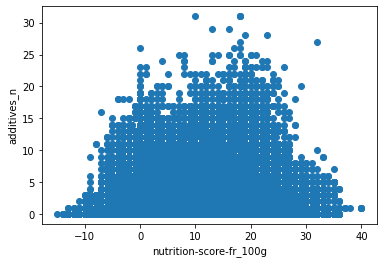

Coefficient de corrélation:
 0.213032851127398


In [26]:
# diagramme de dispersion
plt.plot(data["nutrition-score-fr_100g"],data["additives_n"],'o')
plt.xlabel("nutrition-score-fr_100g")
plt.ylabel("additives_n")
plt.show()

print("Coefficient de corrélation:\n",st.pearsonr(data["nutrition-score-fr_100g"],data["additives_n"])[0])

Il n'y a pas de correlation entre "nutrition-score-fr_100g" et "additives_n".

Vérifions la corrélation entre la variable "nutrition-score-fr_100g" et les autres variables

In [27]:
print("saturated-fat_100g:\n",st.pearsonr(data["nutrition-score-fr_100g"],data["saturated-fat_100g"])[0])
print("fat_100g:\n",st.pearsonr(data["nutrition-score-fr_100g"],data["fat_100g"])[0])
print("sugars_100g:\n",st.pearsonr(data["nutrition-score-fr_100g"],data["sugars_100g"])[0])

print("-"*20)

print("omega-3-fat_100g:\n",st.pearsonr(data["nutrition-score-fr_100g"],data["omega-3-fat_100g"])[0])
print("fiber_100g:\n",st.pearsonr(data["nutrition-score-fr_100g"],data["fiber_100g"])[0])
print("carbohydrates_100g:\n",st.pearsonr(data["nutrition-score-fr_100g"],data["carbohydrates_100g"])[0])

saturated-fat_100g:
 0.5436975279960374
fat_100g:
 0.5055967120778886
sugars_100g:
 0.4181006133403818
--------------------
omega-3-fat_100g:
 0.007616817217267368
fiber_100g:
 -0.11957222237730869
carbohydrates_100g:
 0.22626809153956823


Il n'est existe aucune corrélation entre la variable **"nutrition-score-fr_100g"** et les autres variables quantitatives. Toutefois, nous avons des valeurs correlation un peu élevée pour les variables :

- saturated-fat_100g
- fat_100g
- sugars_100g

## <a name="P2C2"> P2C2 - Analyse de deux variables quantitatives par régression linéaire</a>

### a.) Analyse : 'nutrition-score-fr_100g' et 'saturated-fat_100g'

Equation de la droite de regression :
 y = 4.3 + 0.7x
--------------------------------------------------


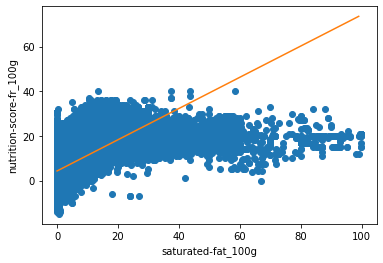

In [28]:
# Estimation de a et b de l'equation de la droite

from scipy.stats import linregress

Y = data['nutrition-score-fr_100g']
X = data['saturated-fat_100g']

slope = round(linregress(X,Y).slope,1)
intercept = round(linregress(X,Y).intercept,1)
print("Equation de la droite de regression :\n",f'y = {intercept} + {slope}x')

print("-"*50)

# droite de regression
a = slope
b = intercept

plt.plot(data['saturated-fat_100g'], data['nutrition-score-fr_100g'], "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("saturated-fat_100g")
plt.ylabel("nutrition-score-fr_100g")
plt.show()

### b.) Analyse : 'nutrition-score-fr_100g' et 'fat_100g'

Equation de la droite de regression :
 y = 3.8 + 0.3x
--------------------------------------------------


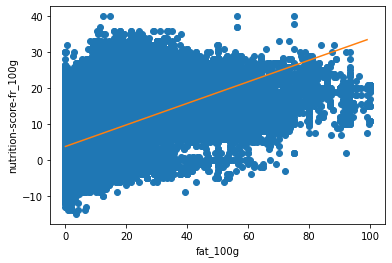

In [29]:
# Estimation de a et b de l'equation de la droite

from scipy.stats import linregress

Y = data['nutrition-score-fr_100g']
X = data['fat_100g']

slope = round(linregress(X,Y).slope,1)
intercept = round(linregress(X,Y).intercept,1)
print("Equation de la droite de regression :\n",f'y = {intercept} + {slope}x')

print("-"*50)

# droite de regression
a = slope
b = intercept

plt.plot(data['fat_100g'], data['nutrition-score-fr_100g'], "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("fat_100g")
plt.ylabel("nutrition-score-fr_100g")
plt.show()

### c.) Analyse : 'nutrition-score-fr_100g' et 'sugars_100g'

Equation de la droite de regression :
 y = 4.3 + 0.2x
--------------------------------------------------


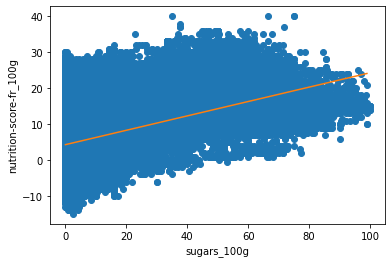

In [30]:
# Estimation de a et b de l'equation de la droite

from scipy.stats import linregress

Y = data['nutrition-score-fr_100g']
X = data['sugars_100g']

slope = round(linregress(X,Y).slope,1)
intercept = round(linregress(X,Y).intercept,1)
print("Equation de la droite de regression :\n",f'y = {intercept} + {slope}x')

print("-"*50)

# droite de regression
a = slope
b = intercept

plt.plot(data['sugars_100g'], data['nutrition-score-fr_100g'], "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("sugars_100g")
plt.ylabel("nutrition-score-fr_100g")
plt.show()

## <a name="P2C2"> P2C2 - Analyse d'une variable qualitative et une variable quantitative </a>

### Analyse : 'nutrition-score-fr_100g' et 'origins'¶

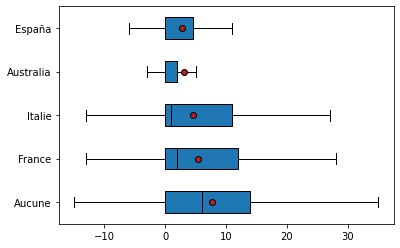

In [31]:
X = "origins" # qualitative
Y = "nutrition-score-fr_100g" # quantitative

modalites = data_n[X].unique()
groupes = []
for m in modalites:
    groupes.append(data_n[data_n[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

On voit ici que les valeurs de "nutrition-score-fr_100g" sont très différentes d'une origine à l'autre.Les valeurs d'origne : "Aucune","France" et "Italie" sont très dipersées.

Les produit originaire de l'australie sont de meilleurs qualités; toutefois, ces produits sont les moins nombreux

Mais vérifions maintenant cette affirmation par les chiffres, grâce à une modélisation.

In [32]:
X = "origins" # qualitative
Y = "nutrition-score-fr_100g" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data_n[X],data_n[Y])

0.0022314664956668887

### Analyse : 'nutrition_grade_fr' et 'additives_n'¶

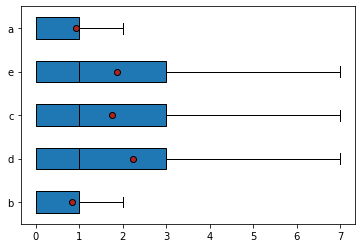

0.06131243856712816

In [33]:
X = "nutrition_grade_fr" # qualitative
Y = "additives_n" # quantitative

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()



def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data[X],data[Y])

Le valeur de "additives_n" pour les nutrition_grade de **"a"** et **"b"**  est moin élevée par rapport aux autres nutrition_grade; avec une moyenne à "1" et maximim à "2"

## <a name="P2C3"> P2C3 - Analyse de deux variables qualitatives avec le Chi-2 </a>

### Analyse : 'nutrition-grade_100g' et 'origins'¶

In [34]:
X = "nutrition_grade_fr"
Y = "origins"

cont = data_n[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

origins,Aucune,Australia,España,France,Italie,Total
nutrition_grade_fr,,,,,,
a,34534,28,60,786,113,35521
b,92089,302,322,1923,158,94794
c,55948,34,98,879,65,57024
d,70692,45,72,1003,110,71922
e,45302,25,17,580,27,45951
Total,298565,434,569,5171,473,305212


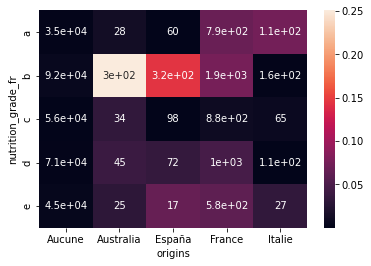

In [35]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data_n)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

Les produits originaires de l'australie ou de l'espagne ont souvent de meilleurs nutrigrade

# <a name="P3"> P3 - Analyse Exploratoire</a>
## <a name="P3C1"> P3C1 - Analyse en Composantes Principales</a>

In [36]:
# Importer les librairies

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [37]:
# Supprimer les colonnes non-numérique
X = data.drop(columns = ['code','product_name','origins','categories','nutrition_grade_fr'])

# garder uniquement les colonnes nutritions
X = X.drop(columns = ['additives_n','ingredients_from_palm_oil_n'])

### <a name ="P3C11"> 1. Centrer et réduire les données </a>

In [38]:
X.describe()

,fat_100g,saturated-fat_100g,sugars_100g,omega-3-fat_100g,fiber_100g,carbohydrates_100g,nutrition-score-fr_100g
count,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000
mean,11.905171,4.814846,15.724474,3.182103,2.840412,31.508174,7.454858
std,14.469227,7.261986,17.883001,0.286996,3.590287,24.639022,8.685815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.500000,0.000000,2.500000,3.182103,0.800000,9.600000,0.000000
50%,10.000000,3.120000,13.330000,3.182103,2.862013,32.073621,5.000000
75%,14.750000,5.000000,16.003369,3.182103,2.862013,47.900000,14.000000
max,99.900000,99.900000,99.950000,60.000000,99.000000,99.950000,40.000000


In [39]:
# On instancie notre scaler : 
scaler = StandardScaler()

# On le fit : 
scaler.fit(X)

# On l'entraine : 
X_scaled = scaler.transform(X)

# On le transforme en DataFrame : 
X_scaled = pd.DataFrame(X_scaled)

# On peut appliquer la méthode .describe() et .round() pour la description et l'arrondi 2 chiffre après la virgule
X_scaled.describe().round(2)

,0,1,2,3,4,5,6
count,320732.00,320732.00,320732.00,320732.00,320732.00,320732.00,320732.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.82,-0.66,-0.88,-11.09,-0.79,-1.28,-2.59
25%,-0.79,-0.66,-0.74,-0.00,-0.57,-0.89,-0.86
50%,-0.13,-0.23,-0.13,-0.00,0.01,0.02,-0.28
75%,0.20,0.03,0.02,-0.00,0.01,0.67,0.75
max,6.08,13.09,4.71,197.97,26.78,2.78,3.75


### <a name ="P3C12"> 2.Variance expliquée </a>

In [40]:
pca = PCA()
pca.fit(X_scaled)

PCA()

L'objet **pca** comprend maintenant un certain nombre d'objets et de fonctions. Le premier objet est le tableau des variances expliquées (explained_variance_ - proportionnelles aux valeurs propres) par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (explained_variance_ratio_).

In [41]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.2678676  1.63820924 1.101184   0.99592079 0.37874663 0.33523069
 0.28286288]
[0.32398008 0.23402916 0.15731151 0.14227396 0.05410649 0.04788995
 0.04040886]


Bien évidemment, il est possible (et préférable) de faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées. Voici un petit code permettant de faire ceci.

In [42]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(a + 1) for a in range(7)], 
        "Variance expliquée" : pca.explained_variance_,
        "variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,variance expliquée,cum. var. expliquée
0,Dim1,2.267868,32.0,32.0
1,Dim2,1.638209,23.0,56.0
2,Dim3,1.101184,16.0,72.0
3,Dim4,0.995921,14.0,86.0
4,Dim5,0.378747,5.0,91.0
5,Dim6,0.335231,5.0,96.0
6,Dim7,0.282863,4.0,100.0


L'idée est de représenter graphiquement ces proportions de variances expliquées 

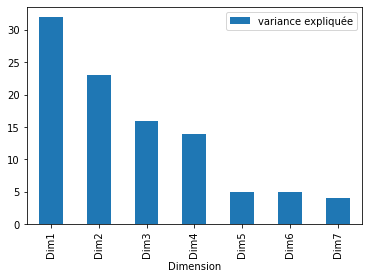

In [43]:
eig.plot.bar(x = "Dimension", y = "variance expliquée") # permet un diagramme en barres
plt.show()

Les deux axes du premier plan factoriel expliqueent plus la variance des données (**56%**).

Nous allons poursuivre, notre analyse sur ce premier plan factoriel.

### <a name ="P3C13"> 3.Représentation des individus </a>

Nous allons maintenant calculer les coordonnées des iris sur les dimensions, avec la fonction transform() de l'objet pca.

In [44]:
X_pca = scaler.fit_transform(X)

In [45]:
# Transformation en DataFrame pandas
X_pca_df = pd.DataFrame({
    "Dim1" : X_pca[:,0], 
    "Dim2" : X_pca[:,1],
    "product_name" : data["product_name"],
    "origins" : data["origins"],
    "nutrition_grade_fr" : data["nutrition_grade_fr"]
})

# Résultat (premières lignes)
X_pca_df.head()

,Dim1,Dim2,product_name,origins,nutrition_grade_fr
0,0.024809,0.001703,Farine de blé noir,Aucune,b
1,1.151745,3.271170,Banana Chips Sweetened (Whole),Aucune,d
2,0.411552,-0.663021,Peanuts,Aucune,b
3,3.126283,0.075070,Organic Salted Nut Mix,Aucune,d
4,-0.723963,-0.466105,Organic Polenta,Aucune,c


Afin de manipuler plus facilement l'objet obtenu par la suite, nous allons créer un DataFrame pandas en ne prenant que les deux premières dimensions.

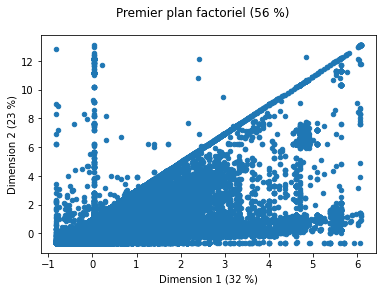

In [46]:
X_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (32 %)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (23 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (56 %)") # titre général
plt.show()

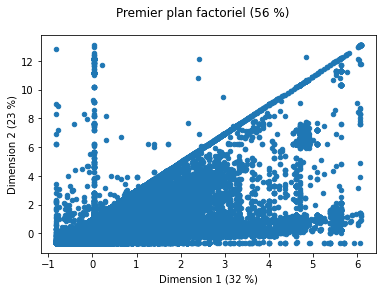

In [47]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
X_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque produit
for k in X_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 102) or (abs(k[1]['Dim2']) > 112):
        ax.annotate(k[1]["product_name"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (32 %)") 
plt.ylabel("Dimension 2 (23 %)")
plt.suptitle("Premier plan factoriel (56 %)")
plt.show()

nous allons colorer les points en fonction de leur nutrition_grade donc.

In [48]:
# permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(X_pca_df["nutrition_grade_fr"].drop_duplicates(), palette(range(6))))
couleurs

{'b': array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 'd': array([0.85098039, 0.37254902, 0.00784314, 1.        ]),
 'c': array([0.45882353, 0.43921569, 0.70196078, 1.        ]),
 'e': array([0.90588235, 0.16078431, 0.54117647, 1.        ]),
 'a': array([0.4       , 0.65098039, 0.11764706, 1.        ])}

Une fois qu'on a associé une couleur à chaque nutrition_grade, on peut utiliser ce dictionnaire comme ci-dessous

In [49]:
position = dict(zip(couleurs.keys(), range(6)))
position

{'b': 0, 'd': 1, 'c': 2, 'e': 3, 'a': 4}

In [ ]:
# Affichage des points avec une liste de couleurs
X_pca_df.plot.scatter(x = "Dim1", y = "Dim2", c = [couleurs[p] for p in X_pca_df["nutrition_grade_fr"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(3, position[cont] / 3 + 2.15 , c = [coul], s = 20)
    plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Dimension 1 (32 %)") 
plt.ylabel("Dimension 2 (23 %)")
plt.suptitle("Premier plan factoriel (56 %)")
plt.show()

Il est aussi possible de différencier l'affichage de ce premier plan par nutrition_grade_fr.

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for cont, coul in couleurs.items():
    ax = fig.add_subplot(2, 3, position[cont] + 1)
    temp = X_pca_df.query('nutrition_grade_fr == "' + cont + '"')
    temp.plot.scatter(x = "Dim1", y = "Dim2", c = [coul], ax = ax)
    ax.set_title(cont)
    ax.set_xlim(X_pca_df.Dim1.quantile([0, 1])) # permet d'avoir min et max
    ax.set_ylim(X_pca_df.Dim2.quantile([0, 1])) # idem
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.show()

### <a name ="P3C14"> 4. Représentation des variables </a>

Lorsqu'on réalise une ACP, surtout dans un contexte exploratoire (et non de compression), il est absolument nécessaire de décrire les axes à partir des variables, afin de comprendre ce qu'ils représentent. Pour cela, nous devons réaliser le cercle des corrélations.

#### Premier plan factoriel (F1 ; F2)

In [ ]:
n = X.shape[0] # nb individus
p = X.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': X.columns, 'F1': corvar[:,0], 'F2': corvar[:,1]})
coordvar

Une fois ces coordonnées récupérées, on peut donc afficher ce cercle des corrélations comme ci-dessous.

In [ ]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
plt.xlabel("F1(32%)") 
plt.ylabel("F2(23%)")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 2)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 2)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["F1"][j],coordvar["F2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

La variables "nutrition-score-fr_100g" est fortement corrélée à la composante principale F1

Les variables "fat_100g" et "saturated-fat_100g" également corrélés à F1.

La variable "nutrition-score-fr_100g" étant confondu à F1, nous allons observer la variabilité des variables moins visibles sur le plan factoriel sur l'axe F3.

#### Plan factoriel (F1, F3)

In [ ]:
n = X.shape[0] # nb individus
p = X.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': X.columns, 'F1': corvar[:,0], 'F3': corvar[:,2]})
coordvar

In [ ]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
plt.xlabel("F1(32%)") 
plt.ylabel("F3(16%)")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 2)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 2)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["F1"][j],coordvar["F3"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

Corrélation entre **nutrition-score** et **sucre**

# <a name ="P4"> CONCLUSION </a>
 

Nous sommes arrivés à la conclusion que : 

- Plus la valeur de nutrition-score est élevée plus les quantités de **graisse**,**acide gras saturés** et de **sucre** sont grandes.
- Cette corrélation est vérifiée pour **72%** de la variabilité des produits. 
- Aucun lien établi entre les variables de nutriments conseillés et le nutrition-score

Au vu de tout ce qui précèdent, nous pouvons conclure que le nutrition-score :
- Permet de prévenir les personnes diabètique sur les risques de la consommation de certains produits.
- Ne permet d'orienter efficacement les malades du diabète dans le choix d'aliments riches en nutriments favorables aux personnes diabétique.
